In [ ]:
import torch

# Знакомство с типом данных Tensor

In [ ]:
torch.zeros([7, 3])

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
torch.ones([3, 4, 5])

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [ ]:
torch.Tensor([[1,  2,  3,  4],
              [5,  6,  7,  8],
              [9, 10, 11, 12]])

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])

In [ ]:
x = torch.Tensor([[1,  2,  3,  4],
                  [5,  6,  7,  8],
                  [9, 10, 11, 12]])

In [ ]:
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


In [ ]:
x.shape

torch.Size([3, 4])

In [ ]:
x + 10

tensor([[11., 12., 13., 14.],
        [15., 16., 17., 18.],
        [19., 20., 21., 22.]])

In [ ]:
x ** 2

tensor([[  1.,   4.,   9.,  16.],
        [ 25.,  36.,  49.,  64.],
        [ 81., 100., 121., 144.]])

In [ ]:
y = torch.Tensor([[12, 11, 10, 9],
                  [8, 7, 6, 5],
                  [4, 3, 2, 1]])

In [ ]:
x % y

tensor([[1., 2., 3., 4.],
        [5., 6., 1., 3.],
        [1., 1., 1., 0.]])

In [ ]:
torch.sin(x)

tensor([[ 0.8415,  0.9093,  0.1411, -0.7568],
        [-0.9589, -0.2794,  0.6570,  0.9894],
        [ 0.4121, -0.5440, -1.0000, -0.5366]])

In [ ]:
x > 3

tensor([[False, False, False,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])

In [ ]:
mask = x > 3

In [ ]:
x[mask]

tensor([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [ ]:
y = x
y[0, 0] = 999
print(x)
print(y)

tensor([[999.,   2.,   3.,   4.],
        [  5.,   6.,   7.,   8.],
        [  9.,  10.,  11.,  12.]])
tensor([[999.,   2.,   3.,   4.],
        [  5.,   6.,   7.,   8.],
        [  9.,  10.,  11.,  12.]])


In [ ]:
import numpy as np
x = np.array([[1, 2, 3, 4],
              [4, 3, 2, 1]])
x

array([[1, 2, 3, 4],
       [4, 3, 2, 1]])

In [ ]:
x = torch.from_numpy(x)
x

tensor([[1, 2, 3, 4],
        [4, 3, 2, 1]])

In [ ]:
x = torch.rand([2000,3000])

In [ ]:
torch.cuda.is_available()

True

In [ ]:
torch.device('cuda:0')

device(type='cuda', index=0)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [ ]:
x_cuda = x.to(device)

In [ ]:
%time y = (x - x + x * 10.0) ** 2

CPU times: user 15.7 ms, sys: 31.3 ms, total: 47 ms
Wall time: 80 ms


In [ ]:
%time y_cuda = (x_cuda - x_cuda + x_cuda * 10.0) ** 2

CPU times: user 1.81 ms, sys: 926 µs, total: 2.74 ms
Wall time: 32.1 ms


# Производные

In [ ]:
x = torch.tensor(
    [[1.,  2.,  3.,  4.],
     [5.,  6.,  7.,  8.],
     [9., 10., 11., 12.]], requires_grad=True)

function = 10 * (x ** 2).sum()

function.backward()

print(x.grad, '<- gradient')

tensor([[ 20.,  40.,  60.,  80.],
        [100., 120., 140., 160.],
        [180., 200., 220., 240.]]) <- gradient


In [ ]:
print(function.grad_fn)
print(function.grad_fn.next_functions[0][0])
print(function.grad_fn.next_functions[0][0].next_functions[0][0])
print(function.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0])

# Нейросеть

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 7.0)

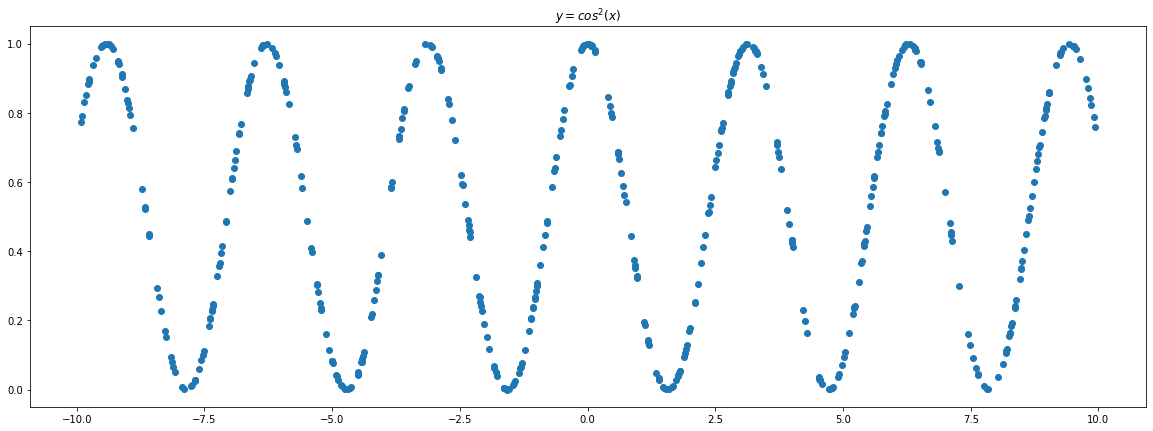

In [ ]:
x_train = torch.rand(500)
x_train = x_train * 20.0 - 10.0

y_train = torch.cos(x_train)**2

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = cos^2(x)$');

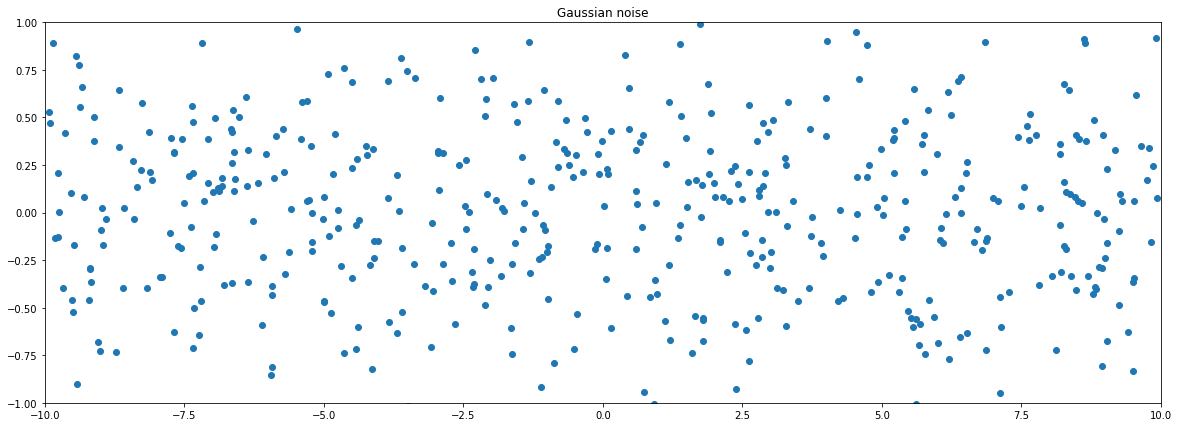

In [ ]:
noise = torch.randn(y_train.shape) / 2.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

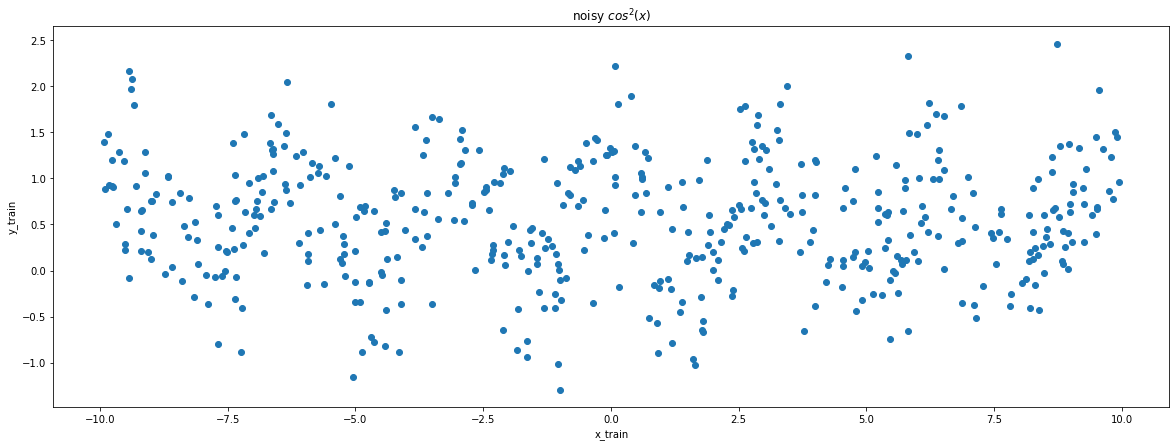

In [ ]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy $cos^2(x)$')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [ ]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);
#; - ограничивает вывод на экран

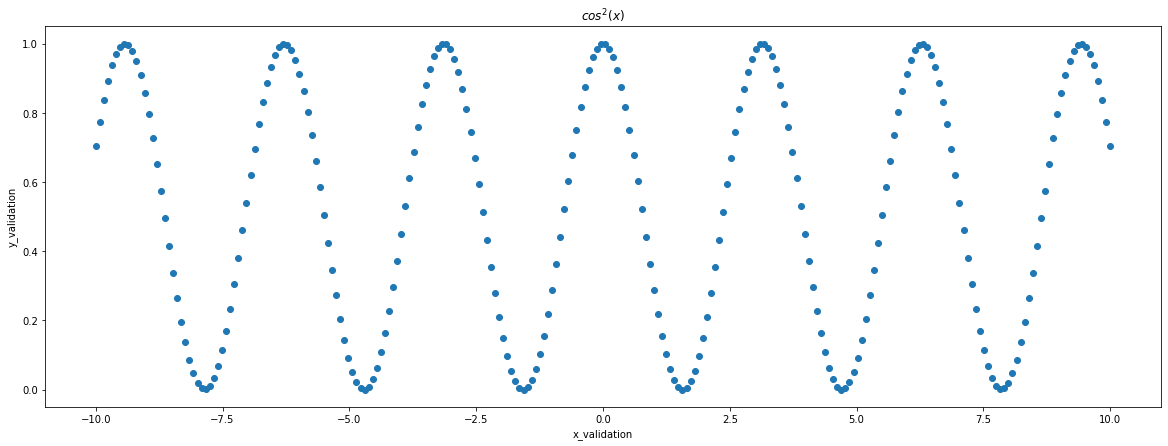

In [ ]:
x_validation = torch.linspace(-10, 10, 250)
y_validation = torch.cos(x_validation.data)**2
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('$cos^2(x)$')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [ ]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

In [ ]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

sine_net = SineNet(50)

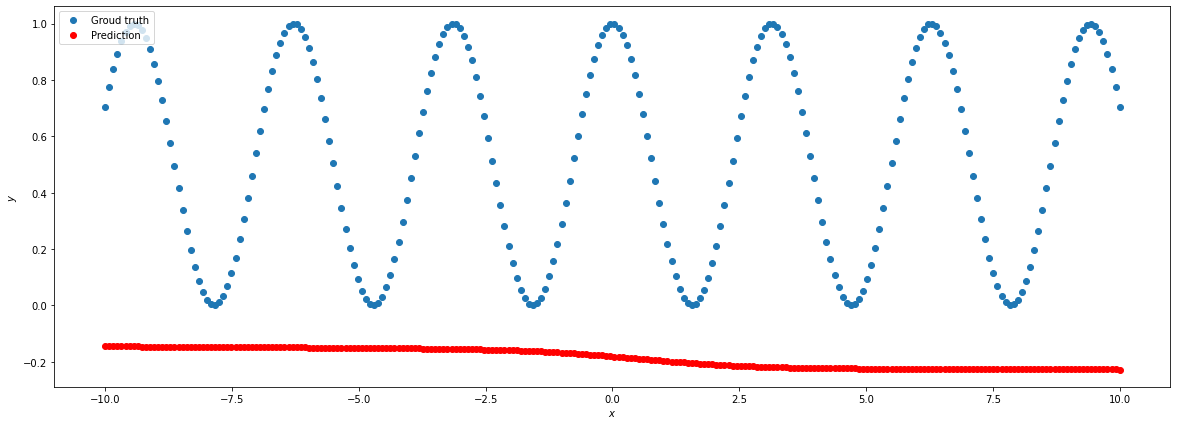

In [ ]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

In [ ]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

In [ ]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

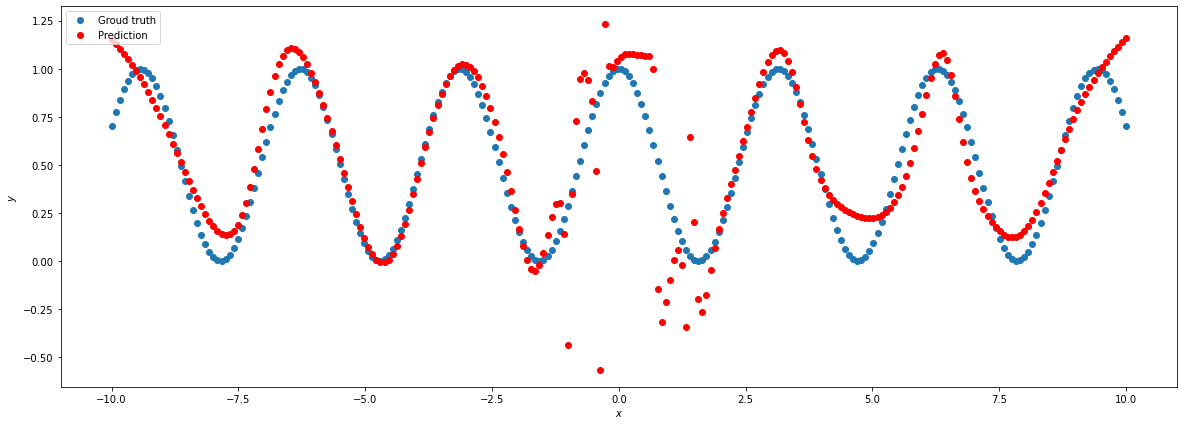

In [ ]:
for epoch_index in range(20000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)
    #print(loss_val)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)

In [ ]:
import pandas as pd
def EMA(values_list, alpha):
    if len(values_list) == 0:
        return 0
    else:
        last = values_list[0]
        return alpha * EMA(values_list[1:], alpha) + (1-alpha) * last

calc = {0.1:[], 0.5:[], 0.9:[]}
for n in range(1, 10):
    values_list = [100] * n
    for alpha in calc.keys():
        e = EMA(values_list, alpha)
        m = sum(values_list) / len(values_list)
        calc[alpha].append(e/m)

pd.DataFrame(calc)

,0.1,0.5,0.9
0,0.900000,0.500000,0.100000
1,0.990000,0.750000,0.190000
2,0.999000,0.875000,0.271000
3,0.999900,0.937500,0.343900
4,0.999990,0.968750,0.409510
5,0.999999,0.984375,0.468559
6,1.000000,0.992188,0.521703
7,1.000000,0.996094,0.569533
8,1.000000,0.998047,0.612580
